In [1]:
from mm_sbi_review.examples.turin import turin, compute_turin_summaries
import torch
import numpy as np
from sbi.inference import NLE
from sbi.utils import BoxUniform
from mm_sbi_review.examples.turin import TurinSummary
import matplotlib.pyplot as plt
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
N = 100
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

x_data_full = (
    torch.tensor(np.load("../data/turin_obs.npy")).float().reshape(N, 801).to(device)
)
x_data_avg = torch.mean(x_data_full, dim=0)

In [3]:
x_data_full.shape

torch.Size([100, 801])

In [4]:
plt.rcParams.update(
    {
        "font.family": "serif",
        "font.size": 16,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.grid": True,
        "grid.alpha": 0.2,
        "grid.linestyle": "--",
    }
)

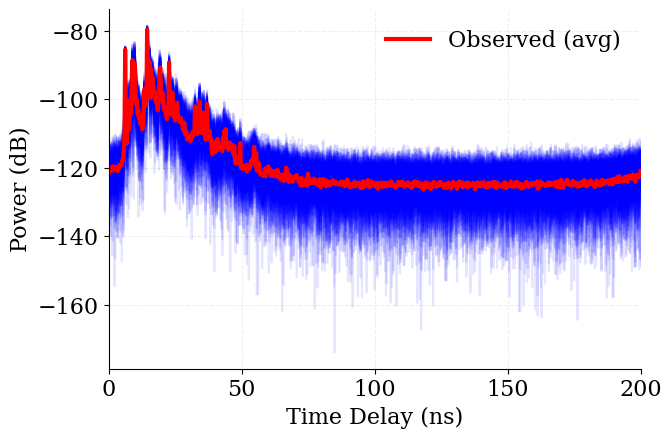

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7 * 2 / 3))

for i in range(N):
    ax.plot(
        np.arange(801) / 4, x_data_full[i, :].cpu().numpy(), color="blue", alpha=0.1
    )
ax.plot(
    np.arange(801) / 4,
    x_data_avg.cpu().numpy(),
    color="red",
    linewidth=3,
    label="Observed (avg)",
)
ax.set_xlim(0, 200)
ax.legend(frameon=False, loc="upper right")
ax.set_xlabel("Time Delay (ns)")
ax.set_ylabel("Power (dB)")

plt.tight_layout()
plt.savefig("figs/turin_data.pdf", bbox_inches="tight")
plt.show()

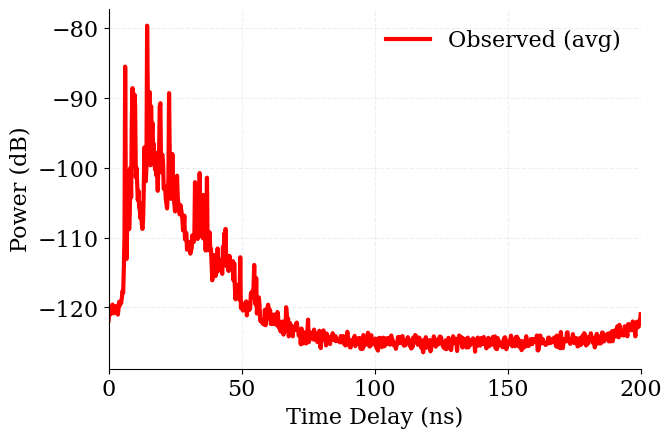

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7 * 2 / 3))

# for i in range(N):
#     ax.plot(
#         np.arange(801) / 4, x_data_full[i, :].cpu().numpy(), color="blue", alpha=0.1
#     )
ax.plot(
    np.arange(801) / 4,
    x_data_avg.cpu().numpy(),
    color="red",
    linewidth=3,
    label="Observed (avg)",
)
ax.set_xlim(0, 200)
ax.legend(frameon=False, loc="upper right")
ax.set_xlabel("Time Delay (ns)")
ax.set_ylabel("Power (dB)")

plt.tight_layout()
plt.savefig("figs/turin_data_obs_only.pdf", bbox_inches="tight")
plt.show()

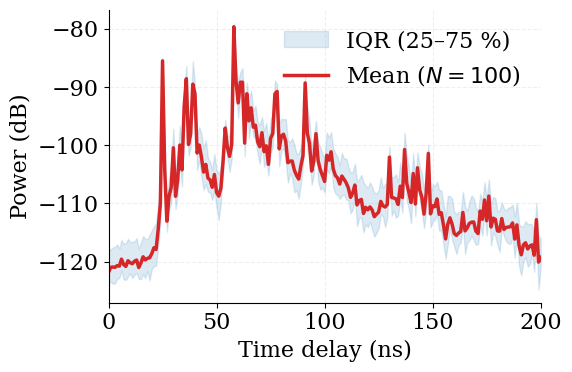

In [7]:
import numpy as np, torch, matplotlib.pyplot as plt

N = 100
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

x_full = (
    torch.tensor(np.load("../data/turin_obs.npy"), dtype=torch.float32)
    .reshape(N, 801)
    .to(device)
)
t_ns = torch.arange(x_full.shape[1], device=device)  # 0 … 800 ns

# keep only 0–200 ns
mask = t_ns <= 200
t = t_ns[mask].cpu().numpy()
x = x_full[:, mask].cpu().numpy()
mean_curve = x.mean(axis=0)
q25, q75 = np.quantile(x, [0.25, 0.75], axis=0)

# ---- style -----------------------------------------------------------------
plt.rcParams.update(
    {
        "font.family": "serif",
        "font.size": 16,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.grid": True,
        "grid.alpha": 0.2,
        "grid.linestyle": "--",
    }
)

fig, ax = plt.subplots(figsize=(6, 4))

# inter-quartile range as a band
ax.fill_between(t, q25, q75, color="tab:blue", alpha=0.15, label="IQR (25–75 %)")

# mean curve
ax.plot(t, mean_curve, color="tab:red", lw=2.5, label="Mean ($N=100$)")

ax.set_xlim(0, 200)
ax.set_xlabel("Time delay (ns)")
ax.set_ylabel("Power (dB)")
ax.legend(frameon=False, loc="upper right")

plt.tight_layout()
plt.show()

In [8]:
import pickle as pkl

with open("../data/turin_rsnl/rsnl_max_adj_params_posterior_samples.pkl", "rb") as f:
    rsnl_max_adj_params_posterior_samples = pkl.load(f)

In [9]:
import numpy as np

adj_params = rsnl_max_adj_params_posterior_samples.values
adj_params = np.concatenate(adj_params, axis=0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import elfi.visualization.visualization

# Define the number of bins
mbins = 30

# Assuming adj_params is a 2D array with shape (num_samples, num_params)
# Extract gamma values from the results
gamma_dict = dict(
    zip(
        ["gamma_{}".format(index) for index in range(adj_params.shape[1])], adj_params.T
    )
)

# Set global font size
plt.rcParams.update({"font.size": 24})

# Plot the marginal distributions
for i, (key, values) in enumerate(gamma_dict.items()):
    plt.figure(figsize=(8, 6))

    # Plot the posterior distribution as a histogram
    plt.hist(
        values, bins=mbins, density=True, alpha=0.8, color="black", label="Posterior"
    )

    # Plot the prior distribution (Laplace(0, 1))
    x = np.linspace(-10, 10, 1000)
    prior = stats.laplace.pdf(x, loc=0, scale=1)
    plt.plot(x, prior, "green", linestyle="dashed", lw=3, label="Prior")

    plt.xlim([-10, 10])
    plt.xticks([-10, -5, 0, 5, 10])
    plt.xlabel(r"$\gamma_{}$".format(str(i + 1)))
    plt.ylabel("Density")
    plt.legend(fontsize=22)
    plt.tight_layout()
    plt.savefig(f"figs/rsnl_adj_param_{str(i)}.pdf")
    plt.clf()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>